## Business Case: Build regression models to predict car price based on various features given:
## Task: Car Price Dataset


In [1]:
#Importthe libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection

#importing metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
#loading the dataset
df=pd.read_csv("CarPrice.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape #there are 205 rows and 26 columns

(205, 26)

In [5]:
df.info() #there are no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.describe() 

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


There are 205 observations, with mean pcar price as 13276.71 and max value as 45400 and min value as 5118

## EDA

In [7]:
#separating out categorical features
cat_feat=[feature for feature in df.columns if df[feature].dtype=='O']
print(cat_feat)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


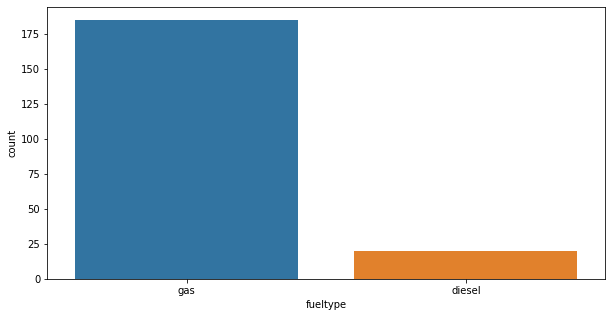

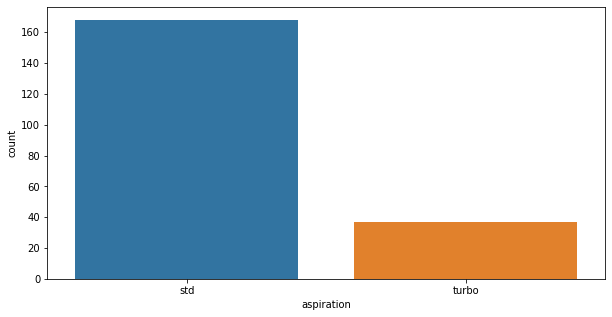

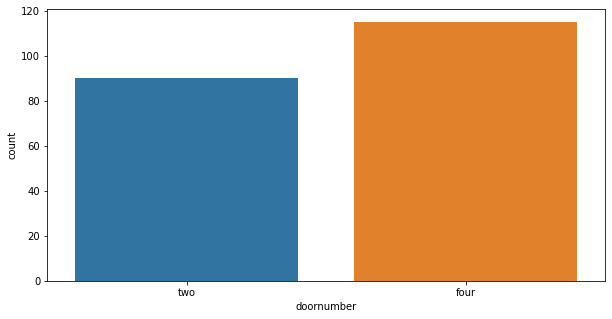

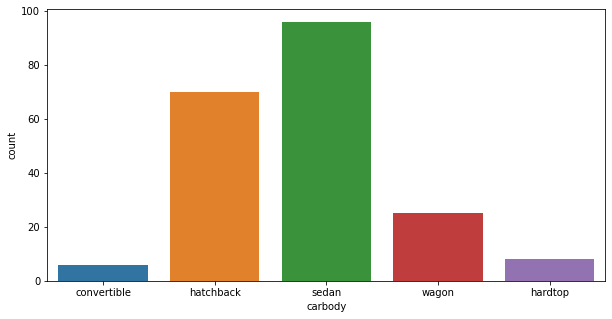

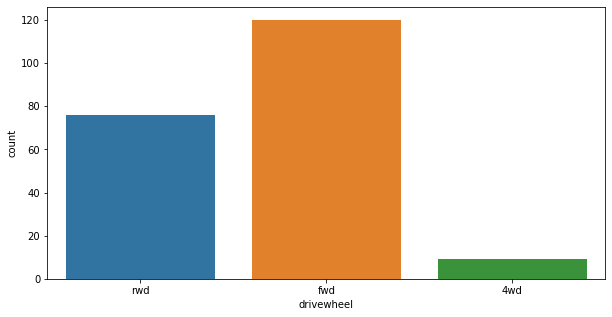

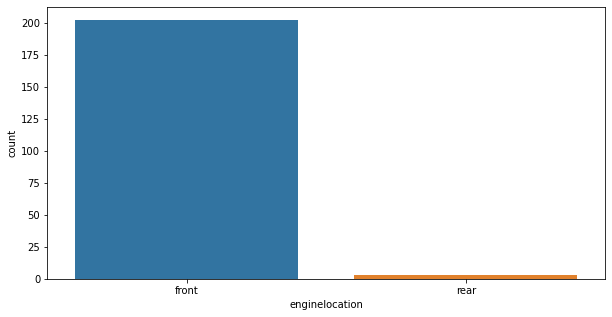

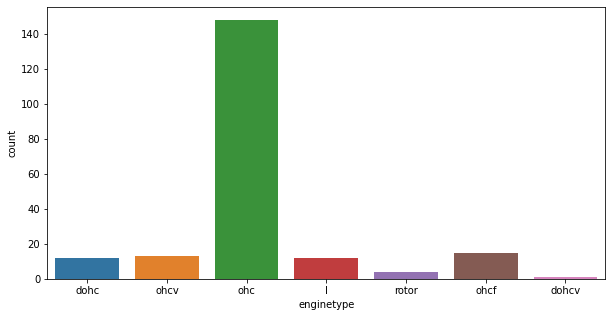

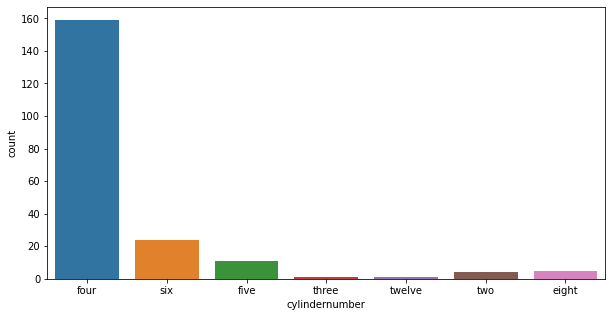

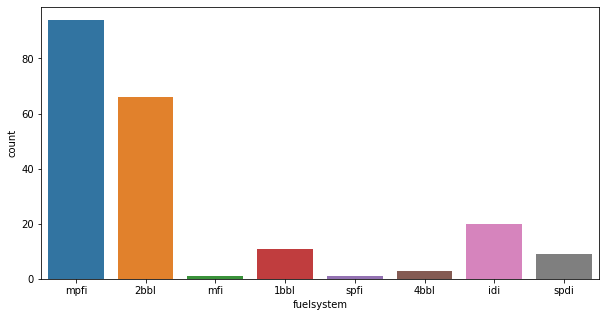

In [8]:
cat_feat1=[feature for feature in cat_feat if len(df[feature].unique())<10]
for feature in cat_feat1 :
    plt.figure(figsize = (10, 5))
    sns.countplot(df[feature])
    plt.show()

In [9]:
#numerical features in the dataset
num_feat=[feature for feature in df.columns if df[feature].dtype!='O']
print(num_feat)

['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


### Plotting Numerical Variables

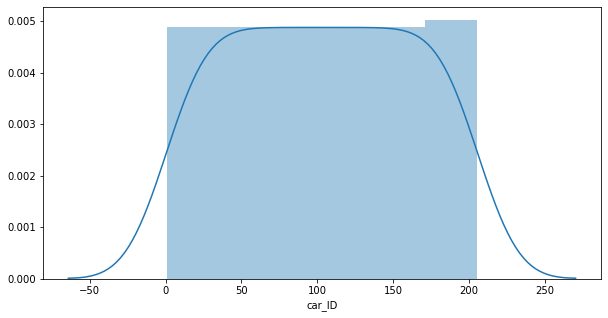

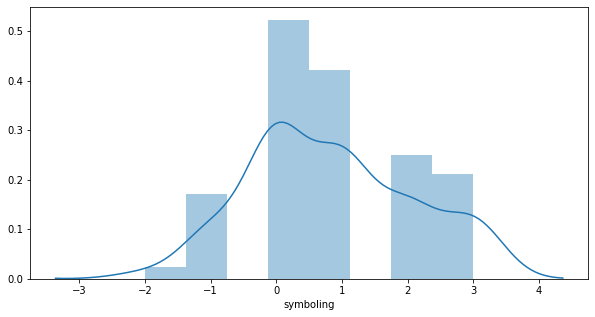

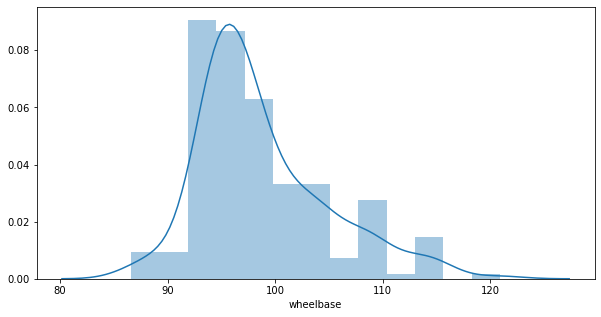

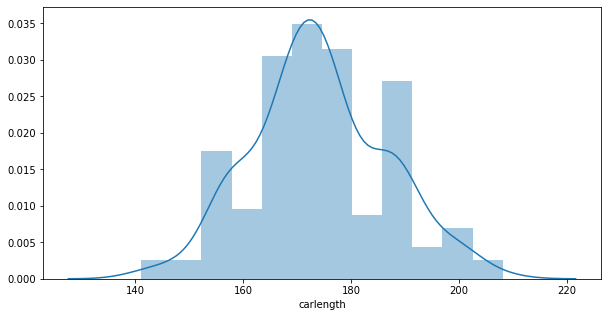

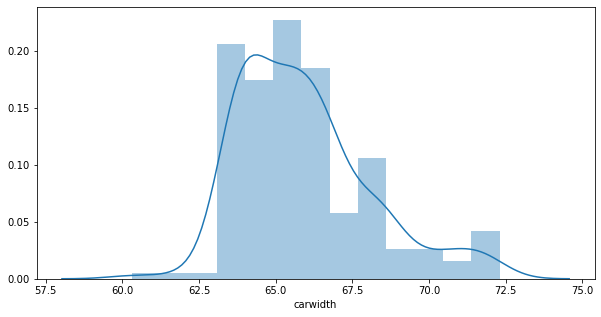

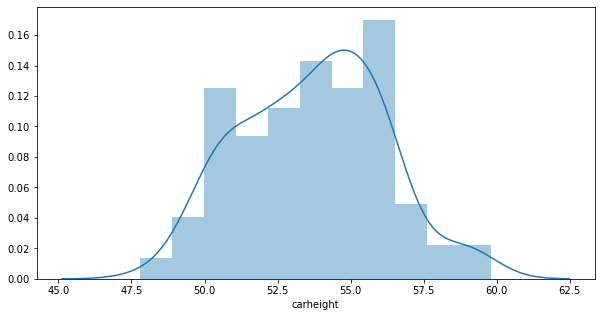

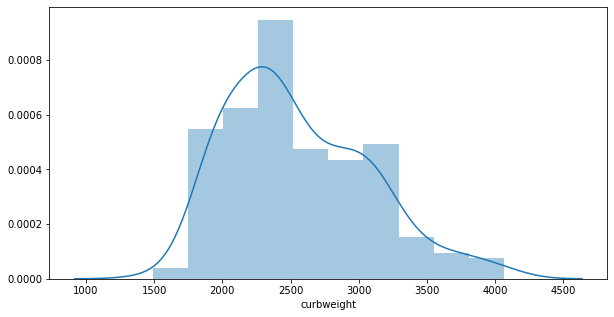

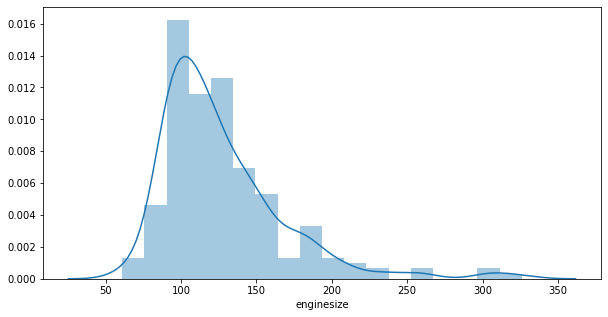

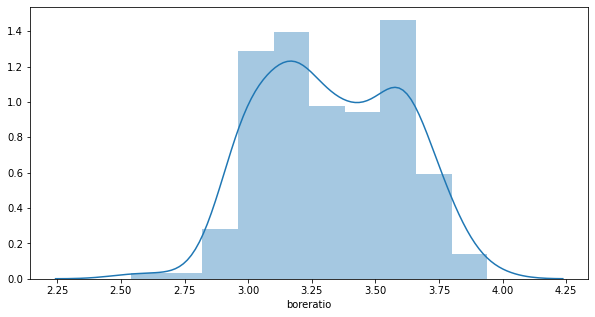

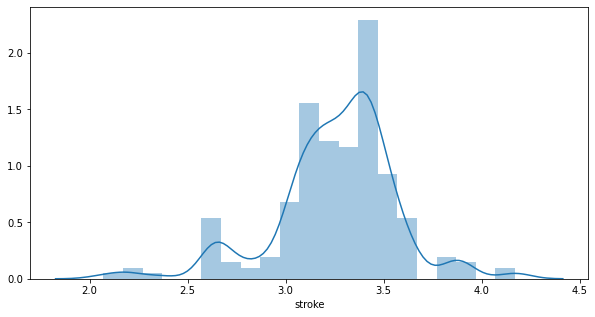

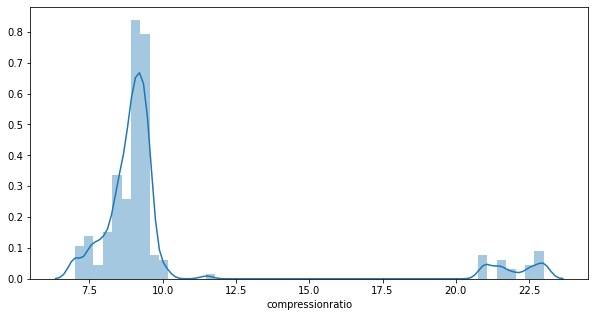

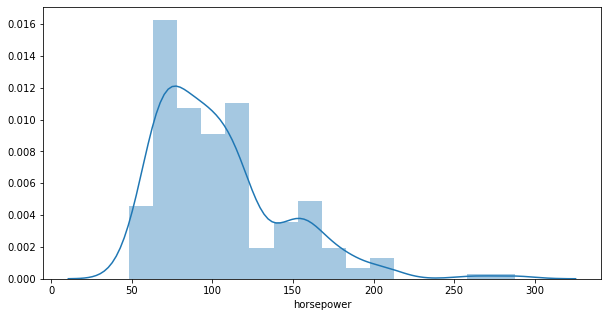

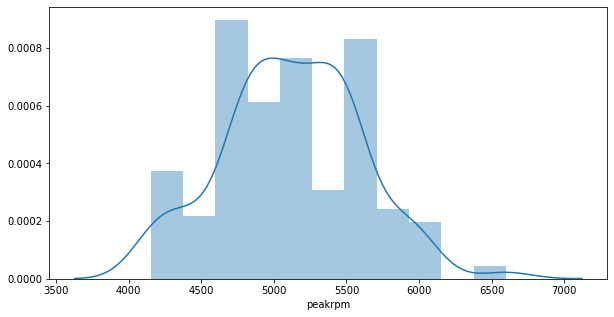

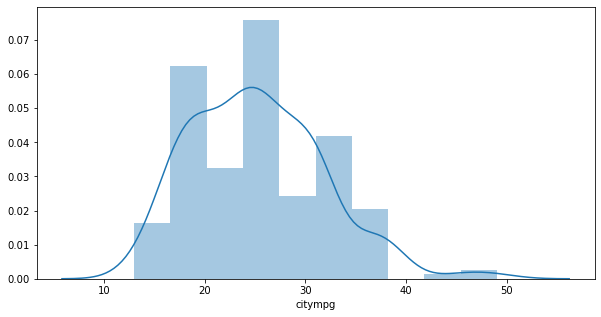

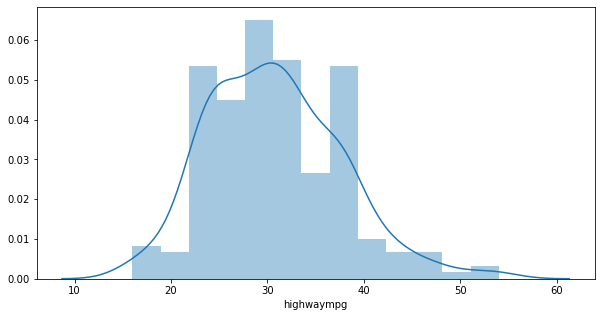

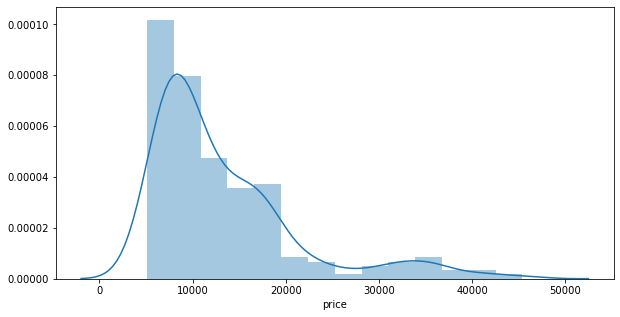

In [11]:
num_feat=[feature for feature in num_feat ]
for feature in num_feat :
    plt.figure(figsize = (10, 5))
    sns.distplot(df[feature],hist=True)
    plt.show()

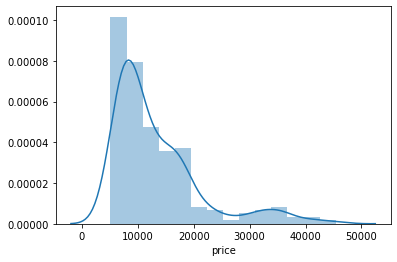

In [12]:
#Distribution of car prices
sns.distplot(df['price'],hist=True)

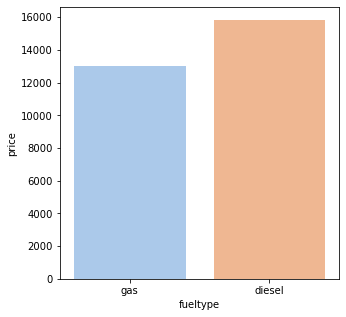

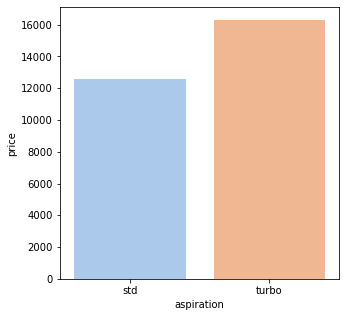

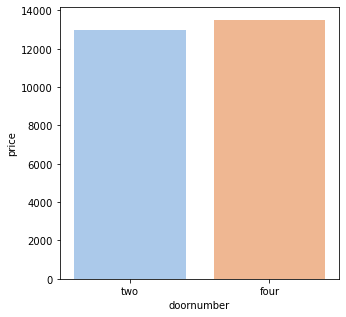

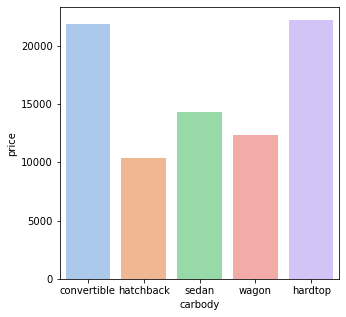

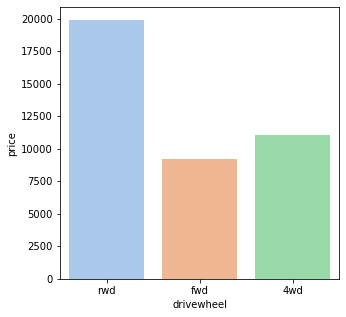

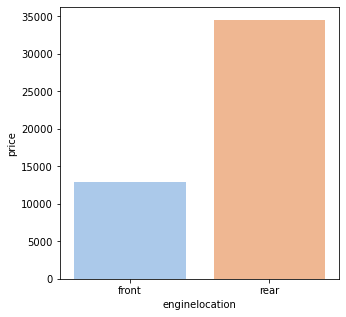

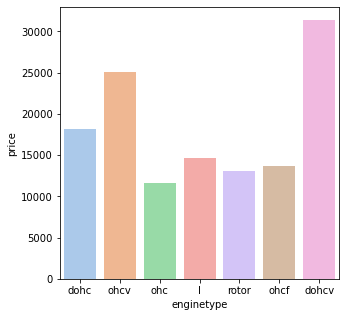

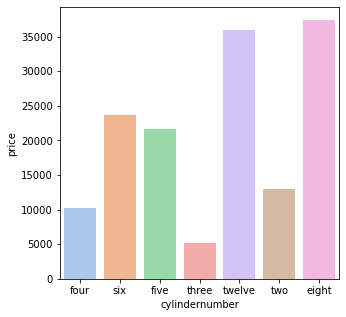

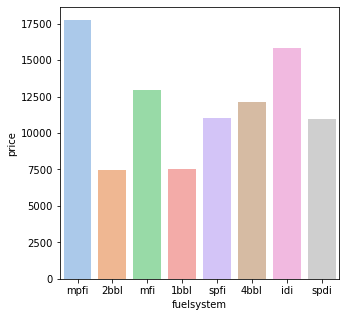

In [13]:
#comparing various  categorical features based on the price of cars

for feature in cat_feat1:
    plt.figure(figsize = (5, 5))
    sns.barplot(x=df[feature],y=df['price'],ci=None,palette='pastel')
    plt.show()

### Plotting numerical VS numerical

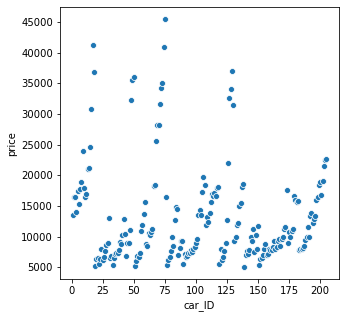

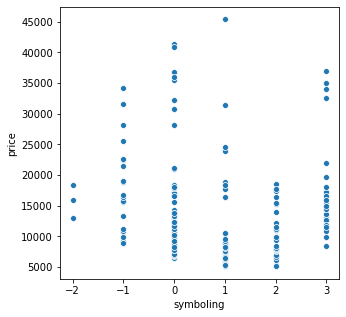

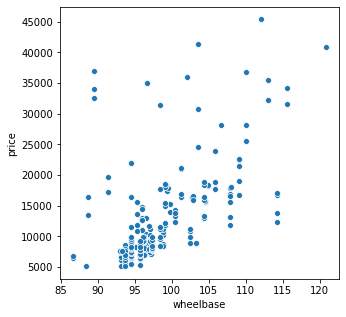

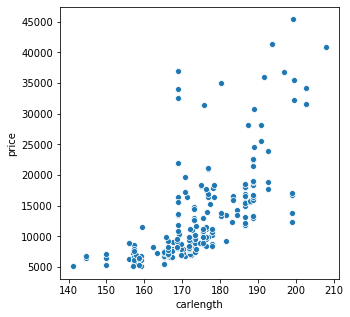

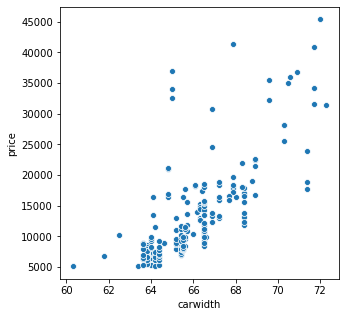

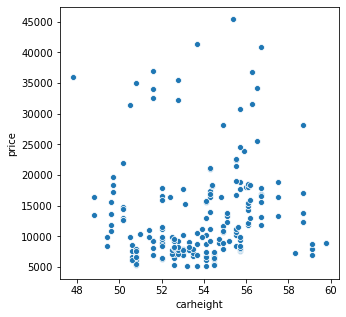

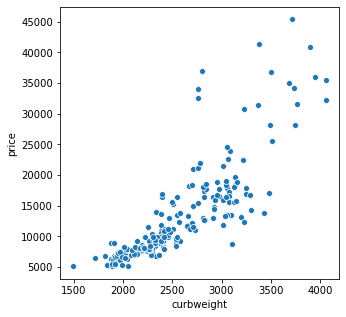

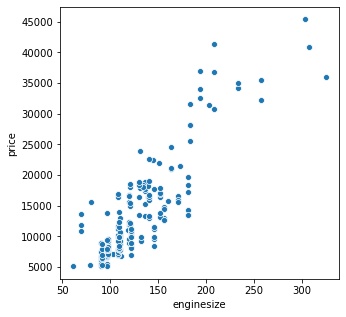

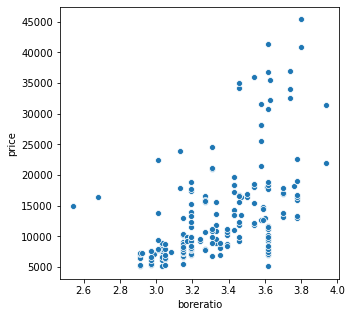

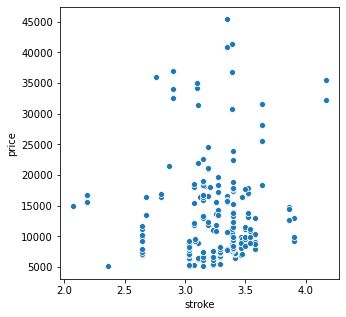

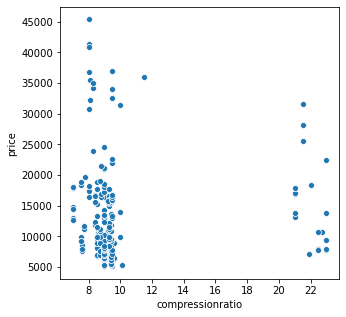

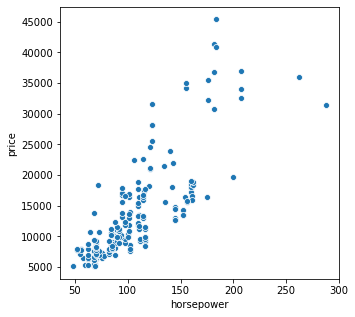

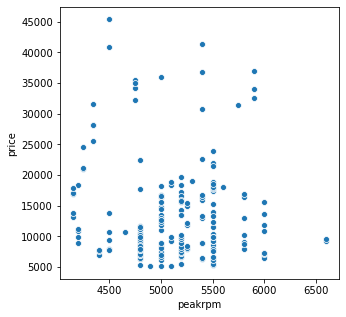

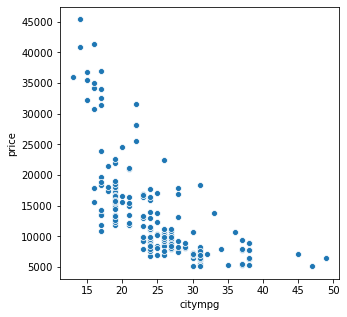

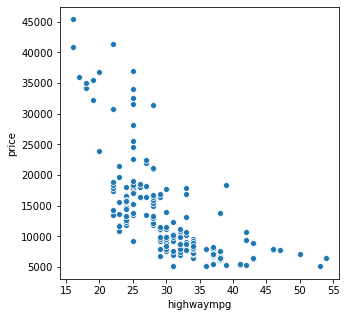

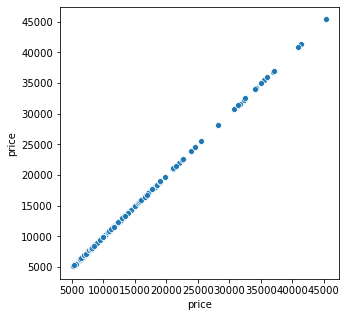

In [15]:
for feature in num_feat:
    plt.figure(figsize = (5, 5))
    sns.scatterplot(x=df[feature],y=df['price'],ci=None,palette='pastel')
    plt.show()

### Observations 

1. Cars using diesel are costlier compared to those using gas 
2. Cars having turbo and having four doors are costlier
3. Car bodies those are convertible and hardtop are costlier
4. Cars having their engine location in the rear end are costlier.
5. Car prices vary according to the engine type 
6. Car prices tend to increase with the increase in the engine number.
7. Cars with the fuel system 'mpfi' has highest price followed by other types 

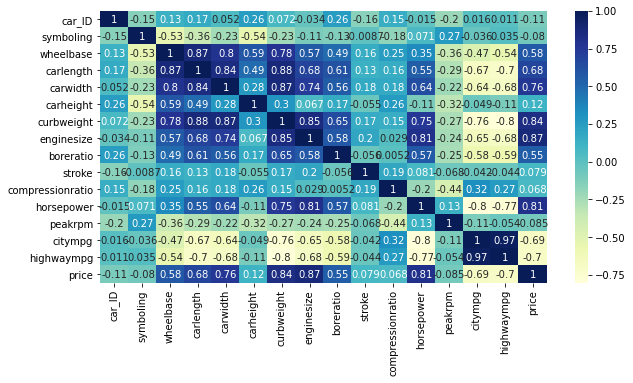

In [16]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(data=df[num_feat].corr(),cmap="YlGnBu",annot=True)
plt.show()

#### Among the numerical features carheight,carwidth,enginesize,horsepower,citympg,highwaympg affect the price of cars to a great extent.

In [17]:
cat_feat

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [24]:
df=pd.get_dummies(df,drop_first=True)

from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['enginelocation']= label_encoder.fit_transform(df['enginelocation'])
  
df['enginelocation'].unique()


df['fueltype']= label_encoder.fit_transform(df['fueltype'])
  
df['fueltype'].unique()

df['cylindernumber']= label_encoder.fit_transform(df['cylindernumber'])
  
df['cylindernumber'].unique()

num_feat1=[feature for feature in df.columns if df[feature].dtype!='O']
print(num_feat1)

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(data=df.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [23]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## MODEL BUILDING & PREDICTIONS

In [ ]:
df.isnull().sum()

In [ ]:
df.head()

In [ ]:
num_feat1

In [ ]:
x= df.loc[:,
 ['symboling',
 'fueltype',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg'
 ]]

y=df['price']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# transform data

scaled = scaler.fit_transform(df[num_feat1])

print(scaled)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)


In [ ]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

In [ ]:
x.head()

In [ ]:
y.head()

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
dtree.fit(x_train,y_train)

In [ ]:
pred=dtree.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test, y_pred=pred))


In [ ]:
y_test.head()

In [ ]:
pred

## Random Forest

In [ ]:
RForest=RandomForestRegressor()
RForest.fit(x_train,y_train)

In [ ]:
r_pred=RForest.predict(x_test)

In [ ]:
print(r2_score(y_true=y_test, y_pred=r_pred))


In [ ]:
r_pred

In [ ]:
y_test.head()

In [ ]:
print(r_pred.shape)
print('\n')
print(y_test.shape)

## METRICS : DECISION TREE VS RANDOM FOREST

In [ ]:
#FOR DECISION TREE METRICS
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)   
r2 = metrics.r2_score(y_test,pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

In [ ]:
#For Random Forest Metrics
r_mae = metrics.mean_absolute_error(y_test, r_pred)
r_mse = metrics.mean_squared_error(y_test, r_pred)
r_rmse = np.sqrt(mse)   
r_r2 = metrics.r2_score(y_test,r_pred)

print("Results of sklearn.metrics:")
print("MAE:",r_mae)
print("MSE:", r_mse)
print("RMSE:",r_rmse)
print("R-Squared:", r_r2)


## Thus we can say comparing the metrics that Random Forest is a better model to predict car prices compared to Decision Trees.

### Now we try to see whether the accuracy increases due to dropping of variables

In [ ]:
x=df.loc[:,['wheelbase' , 'carlength', 'carwidth','carlength','curbweight','enginesize','boreratio','compressionratio',
             'horsepower','citympg','highwaympg']]

y=df['price']

In [ ]:
dtree=DecisionTreeRegressor()
dtree.fit(x_train,y_train)

In [ ]:
pred=dtree.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test, y_pred=pred))


In [ ]:
#For Random Forest Metrics

r_mae = metrics.mean_absolute_error(y_test, r_pred)
r_mse = metrics.mean_squared_error(y_test, r_pred)
r_rmse = np.sqrt(mse)   
r_r2 = metrics.r2_score(y_test,r_pred)

print("Results of sklearn.metrics:")
print("MAE:",r_mae)
print("MSE:", r_mse)
print("RMSE:",r_rmse)
print("R-Squared:", r_r2)


In [ ]:
RForest=RandomForestRegressor()
RForest.fit(x_train,y_train)

In [ ]:
r_pred=RForest.predict(x_test)

In [ ]:
print(r2_score(y_true=y_test, y_pred=r_pred))

### WE observe that after dropping the variables the r2 score value decreases for random forest but increases for decision trees

#example of scaling


cols_drop=['Price','price_log','Cylinders']
X=final_all_df.drop(cols_drop,axis=1)
y=final_all_df['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)